# Рынок заведений общественного питания Москвы

### Описание проекта
Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
У вас есть открытые данные о заведениях общественного питания в Москве.

## Шаг 1. Загрузка и подготовка данных к анализу

Импортируем библиотеки:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl

Прочитаем файл `/datasets/rest_data.csv` и сохраним его в переменную соответственно `data`.<br>
Для того что бы не получать ошибки при загрузке файла, то локально, то с сервера, используем следующий код:

In [2]:
import os

pth1 = '/datasets/rest_data.csv'
pth2 = './rest_data.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1)    
elif os.path.exists(pth2):
    data = pd.read_csv(pth2)
else:
    print("Проверьте правильность пути к датасету")

Создадим функицию, позволяющую проводить первичный анализ исходных данных:

In [3]:
def info(data):
    print('Первые 5 строк:')
    display(data.head())
    print('')
    print('информация:')
    display(data.info())
    print('')
    print('Общие параметры:')
    print(data.describe())
    print('')
    print('Названия столбцов:')
    print(data.columns)
    print('')
    print('Количество дубликатов:')
    print(data.duplicated().sum())
    print('')
    print('Пропущенные значения:')
    print(data.isna().sum())
    print('')
    display(pd.DataFrame(round((data.isna().mean()*100),2),columns=['NaNs,%']).style.format('{:.2f}'))

Применим функцию к нашемудатасету:

In [4]:
info(data)

Первые 5 строк:


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50



информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


None


Общие параметры:
                  id        number
count   15366.000000  15366.000000
mean   119720.066901     59.547182
std     73036.130732     74.736833
min       838.000000      0.000000
25%     28524.000000     12.000000
50%    144974.500000     40.000000
75%    184262.250000     80.000000
max    223439.000000   1700.000000

Названия столбцов:
Index(['id', 'object_name', 'chain', 'object_type', 'address', 'number'], dtype='object')

Количество дубликатов:
0

Пропущенные значения:
id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64



,"NaNs,%"
id,0.00
object_name,0.00
chain,0.00
object_type,0.00
address,0.00
number,0.00


#### Описание данных
Таблица rest_data:<br>
`id` — идентификатор объекта;<br>
`object_name` — название объекта общественного питания;<br>
`chain` — сетевой ресторан;<br>
`object_type` — тип объекта общественного питания;<br>
`address` — адрес;<br>
`number` — количество посадочных мест.

Максимальное значение посадочных мест 1700, а минимальное - 0. Проверим у каких ресторанов такие возможности:

In [5]:
display(data.query('number == 1700'))
display(data.query('number == 0').head())

,id,object_name,chain,object_type,address,number
12723,199696,Arena by Soho Family,нет,бар,"город Москва, Кутузовский проспект, дом 36, ст...",1700


,id,object_name,chain,object_type,address,number
137,115498,Пекарня & Донер,нет,закусочная,"город Москва, Бутырская улица, дом 9, корпус 2",0
154,152556,Шаурма в пите,нет,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0
157,149568,Суши,нет,предприятие быстрого обслуживания,"город Москва, улица Маршала Василевского, дом ...",0
190,126956,"Шаурма, куры-гриль",нет,предприятие быстрого обслуживания,"город Москва, 1-я Владимирская улица, дом 21",0
195,149531,"Шаурма, куры-гриль",нет,предприятие быстрого обслуживания,"город Москва, 2-я Владимирская улица, дом 44/10",0


Убираем столбец идентификатор, т.к. данные могли быть внесены из разных баз. Откинув столбец с идентификаторами проверим количество дубликатов и удалим их.

In [6]:
data.drop('id', inplace=True, axis=1)

In [7]:
data.duplicated().sum()

82

In [8]:
data.drop_duplicates(keep='first').head()

,object_name,chain,object_type,address,number
0,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


### вывод
В исходных данных названия столбцов в соответствии со "змеиным регистром", отсутствуют явные дубликаты и пропущенные значения, тип и формат данных корректные. Обнаружены и удалены неявные дубликаты. В таблице все еще могут оставаться не уникальные названия, например: 'KFC' и 'kfc', 'Милти' и 'МИЛТИ'. В наших данные большое количество заведений и искать такие трудоемко и трудозатратно, а также в этом нет особой необходимости, поэтому этот анализ мы выполнять не будем. Столбец `chain` может быть изменен на булевый тип, но пока в этом не вижу необходимости. По количеству посадочных мест только одно метсо может посадить 1700 человек. Это клуб-бар Arena by Soho Family. К заведениям без посадочных мест относятся предприятия быстрого обслуживания: фаст-фуд, "шаурмичные", магазины с готовой едой.<br>
Данные готовы для дальнейшего использования.

## Шаг №2. Анализ данных

Исследуем соотношение видов объектов общественного питания по количеству.

In [9]:
data.head()

,object_name,chain,object_type,address,number
0,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [10]:
data_clear = (data.groupby('object_type', as_index=False)
    .agg(
    {'object_name' : 'count', 'chain':'count','number' : 'mean', 'number' : 'sum'})).sort_values(
    by=['object_type'])
data_clear.columns = ['object_type','chain', 'mean_place', 'sum_place']
data_clear.head(10)

,object_type,chain,mean_place,sum_place
0,бар,856,856,37231
1,буфет,585,585,29911
2,закусочная,360,360,2739
3,кафе,6099,6099,242228
4,кафетерий,398,398,3631
5,магазин (отдел кулинарии),273,273,1526
6,предприятие быстрого обслуживания,1923,1923,39522
7,ресторан,2285,2285,221266
8,столовая,2587,2587,336948


In [11]:
data_type = data.groupby('object_type').count().reset_index().sort_values(by='object_type', ascending=False)
data_type.head(10)

,object_type,object_name,chain,address,number
8,столовая,2587,2587,2587,2587
7,ресторан,2285,2285,2285,2285
6,предприятие быстрого обслуживания,1923,1923,1923,1923
5,магазин (отдел кулинарии),273,273,273,273
4,кафетерий,398,398,398,398
3,кафе,6099,6099,6099,6099
2,закусочная,360,360,360,360
1,буфет,585,585,585,585
0,бар,856,856,856,856


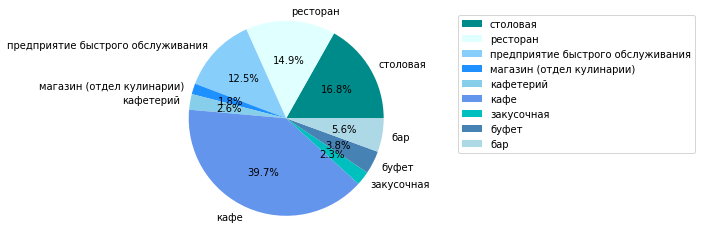

In [12]:
with plt.style.context('seaborn-pastel'):
    
    colors = ['darkcyan','lightcyan', 'lightskyblue','dodgerblue','skyblue','cornflowerblue','c', 'steelblue', 'lightblue']
    vals = data_type['object_name']
    labels = data_type['object_type']
    fig, ax = plt.subplots()
#     ax.set_title('Соотношение видов объектов общественного питания')
    ax.pie(vals, labels=labels, autopct='%1.1f%%',colors=colors)
    plt.legend(loc='upper left',bbox_to_anchor=(1,1))
    ax.axis("equal");


Почти 40% занимают кафе, на втором месте - столовые (16,8%), на третьем - рестораны (15%).<br>
Теперь исследуем соотношение сетевых и несетевых заведений по количеству.

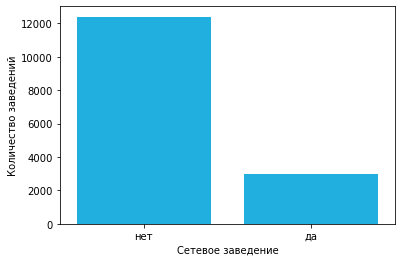

In [13]:
#with plt.style.context('seaborn-pastel'):
data_chain = data.groupby('chain').count().reset_index().sort_values(by='object_name', ascending=False)
data_type.head()
ax = sns.barplot(data=data_chain, x="chain", y="object_name", color='deepskyblue')
#ax.set_title('Соотношение сетевых и несетевых заведений')
ax.set_xlabel('Сетевое заведение')
ax.set_ylabel('Количество заведений');

Большинство заведений в Москве не является сетевыми.<br>
Рассмотрим для какого вида объекта общественного питания характерно сетевое распространение.

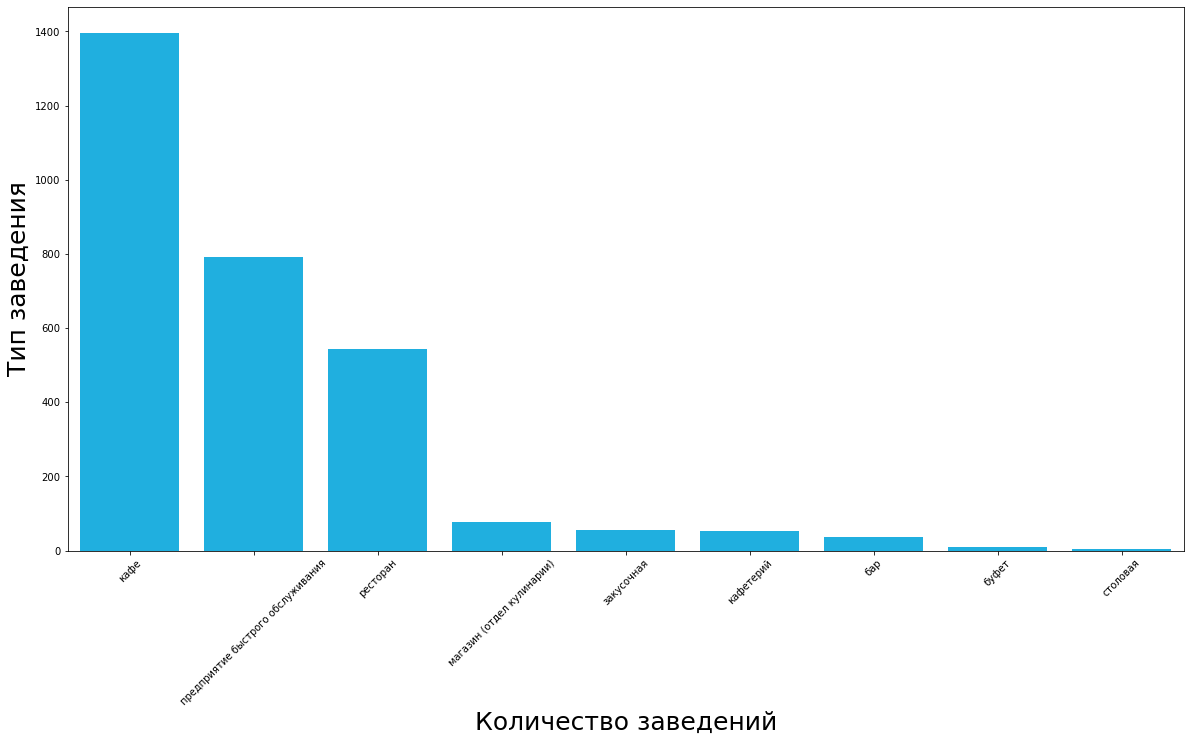

In [14]:
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(20,10))
    df = data.query('chain == "да"').groupby('object_type').count().reset_index().sort_values(by='object_name', ascending=False)
    ax = sns.barplot(data=df, x="object_type", y="object_name", estimator=np.sum, color='deepskyblue')
    #ax.set_title('Распределение сетевых заведений', fontsize=24)
    ax.set_xlabel('Количество заведений', fontsize=25)
    ax.set_ylabel('Тип заведения', fontsize=25)
    labels = ax.set_xticklabels(df['object_type'],
                   fontsize = 10,    #  Размер шрифта
                   rotation = 45,    #  Поворот текста
                   verticalalignment =  'top') ;

In [15]:
d1 = data.groupby(['object_type']).agg({'object_type': 'count'}).rename(columns={'object_type': 'count_all'})
#display(d1)
d2 = data.query('chain == "да"').groupby(['object_type']).agg({'object_type': 'count'}).rename(columns={'object_type': 'count'})
#display(d2)
d3 = d1.join(d2).reset_index()
#Доля сетевых заведений в сегменте
d3['part'] = d3['count']/d3['count_all']
d3['part_per_cent'] = d3['part']*100
d3

,object_type,count_all,count,part,part_per_cent
0,бар,856,37,0.043224,4.322430
1,буфет,585,11,0.018803,1.880342
2,закусочная,360,56,0.155556,15.555556
3,кафе,6099,1396,0.228890,22.888998
4,кафетерий,398,52,0.130653,13.065327
5,магазин (отдел кулинарии),273,78,0.285714,28.571429
6,предприятие быстрого обслуживания,1923,791,0.411336,41.133645
7,ресторан,2285,544,0.238074,23.807440
8,столовая,2587,3,0.001160,0.115964


<Figure size 1000x600 with 0 Axes>

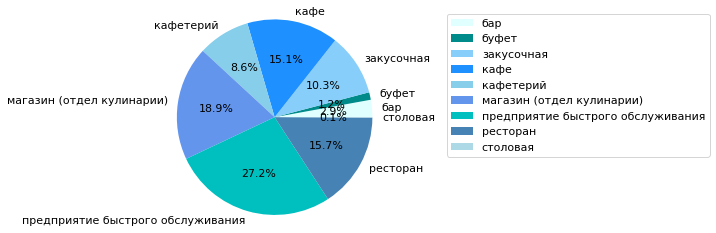

In [16]:
with plt.style.context('seaborn-pastel'):

    dpi = 100
    fig = plt.figure(dpi = dpi, figsize = (1000 / dpi, 600 / dpi) )
    mpl.rcParams.update({'font.size': 11})

    colors = ['lightcyan', 'darkcyan','lightskyblue','dodgerblue','skyblue','cornflowerblue','c', 'steelblue', 'lightblue']
    vals = d3['part_per_cent']
    labels = d3['object_type']
    fig, ax = plt.subplots()
#     ax.set_title('Доля сетевых заведений в сегменте')
    ax.pie(vals,labels=labels,autopct='%1.1f%%', colors=colors)
    plt.legend(labels=labels, loc='upper left',bbox_to_anchor=(1,1))
    ax.axis("equal");

In [17]:
data_new = data.query('chain == "да"').groupby(['object_type']).agg({'object_type': 'count'}).apply(
    lambda x: 100 * x / float(x.sum())).rename(columns={'object_type': 'object_type_1'}).sort_values(
    by='object_type_1', ascending=True)
data_new

,object_type_1
object_type,
столовая,0.101078
буфет,0.370620
бар,1.246631
кафетерий,1.752022
закусочная,1.886792
магазин (отдел кулинарии),2.628032
ресторан,18.328841
предприятие быстрого обслуживания,26.650943
кафе,47.035040


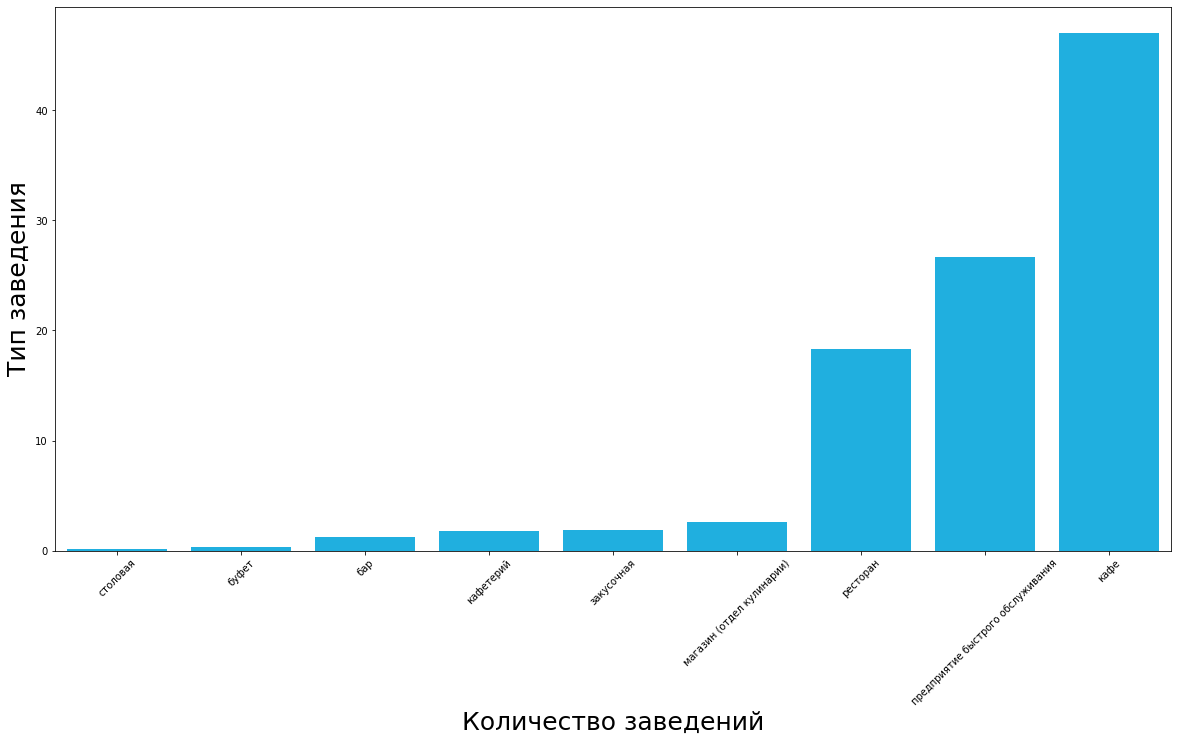

In [18]:
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(20,10))
    df = data_new
    ax = sns.barplot(data=df, x=df.index, y="object_type_1", estimator=np.sum, color='deepskyblue')
    labels = df.index
    #ax.set_title('Распределение сетевых заведений', fontsize=24)
    ax.set_xlabel('Количество заведений', fontsize=25)
    ax.set_ylabel('Тип заведения', fontsize=25)
    labels = ax.set_xticklabels(df.index,
                   fontsize = 10,    #  Размер шрифта
                   rotation = 45,    #  Поворот текста
                   verticalalignment =  'top') ;
   # 'top', 'bottom', 'center', 'baseline', 'center_baseline'

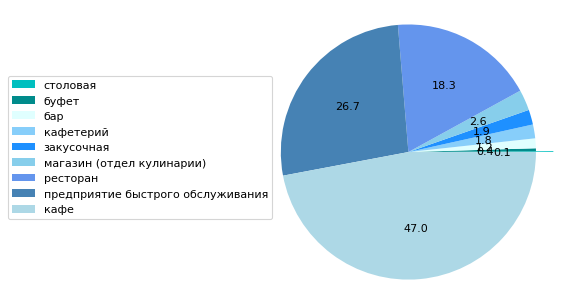

In [19]:
data_names = data_new.index
data_values = data_new['object_type_1']
colors = ['c','darkcyan','lightcyan','lightskyblue', 'dodgerblue','skyblue','cornflowerblue', 'steelblue', 'lightblue']

dpi = 80
fig = plt.figure(dpi = dpi, figsize = (800 / dpi, 384 / dpi) )
mpl.rcParams.update({'font.size': 10})

#plt.title('Распределение кафе по городам России (%)')

xs = range(len(data_names))

plt.pie(
    data_values, autopct='%.1f', radius = 1.1,
    explode = [0.15] + [0 for _ in range(len(data_names) - 1)], colors=colors )
plt.legend(
    bbox_to_anchor = (-0.2, 0.25, 0.25, 0.25),
    loc = 'lower right', labels = data_names )
fig.savefig('pie.png')

#best
# 	upper right
# 	upper left
# 	lower left
# 	lower right
# 	right
# 	center left
# 	center right
# 	lower center
# 	upper center
# 	center

Больше всего кафе среди сетевых заведений.<br>
Необходимо изучить что характерно для сетевых заведений:много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест.

In [20]:
data_new1 = data.query('chain == "да"').groupby(['object_type']).agg({'number': 'median'}).sort_values(
    by=('number'), ascending=False).reset_index()
data_new2 = data.query('chain == "да"').groupby(['object_name']).agg(
    {'number': ('max','min','median','mean','count')}).sort_values(by=('number','max'), ascending=False).reset_index()
display(data_new1, data_new2)

,object_type,number
0,столовая,120.0
1,ресторан,88.5
2,бар,45.0
3,кафе,40.0
4,предприятие быстрого обслуживания,25.0
5,закусочная,8.0
6,кафетерий,8.0
7,магазин (отдел кулинарии),3.5
8,буфет,0.0


object_name number                             
                                    max min median        mean count
0                     МАКДОНАЛДС    580   0   90.0  110.758621    29
1                     Чайхона №1    500   0   99.5  148.785714    42
2                     Макдоналдс    480   0   75.0   81.500000   122
3                       ЯКИТОРИЯ    456  64  152.0  185.600000     5
4                  Кафе «Кружка»    428  80  134.0  194.000000     4
..                           ...    ...  ..    ...         ...   ...
719                    Movenpick      0   0    0.0    0.000000     1
720          Кофейня «Кофе Хаус»      0   0    0.0    0.000000     1
721                   Ливан-Хаус      0   0    0.0    0.000000     1
722  Магазин готовой еды «Милти»      0   0    0.0    0.000000     3
723                    Marmalato      0   0    0.0    0.000000     1

[724 rows x 6 columns]

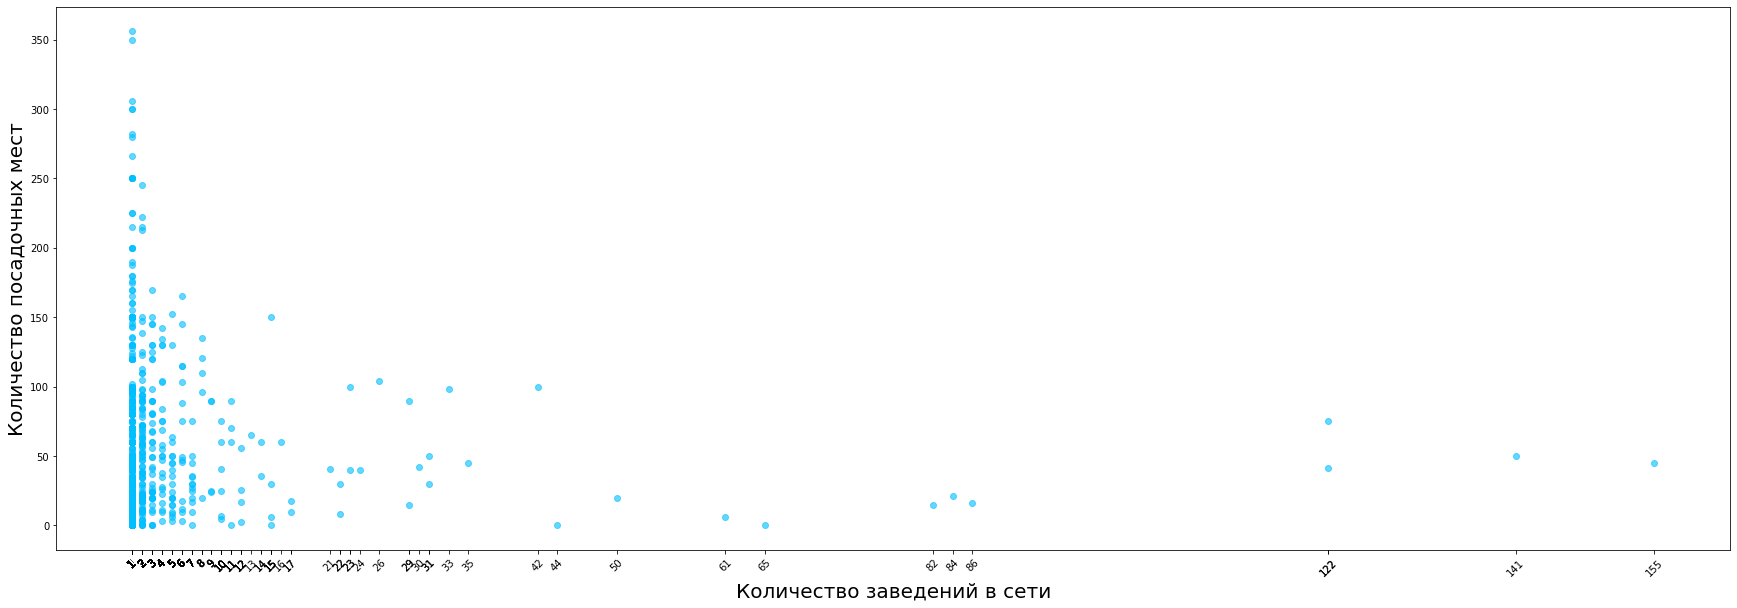

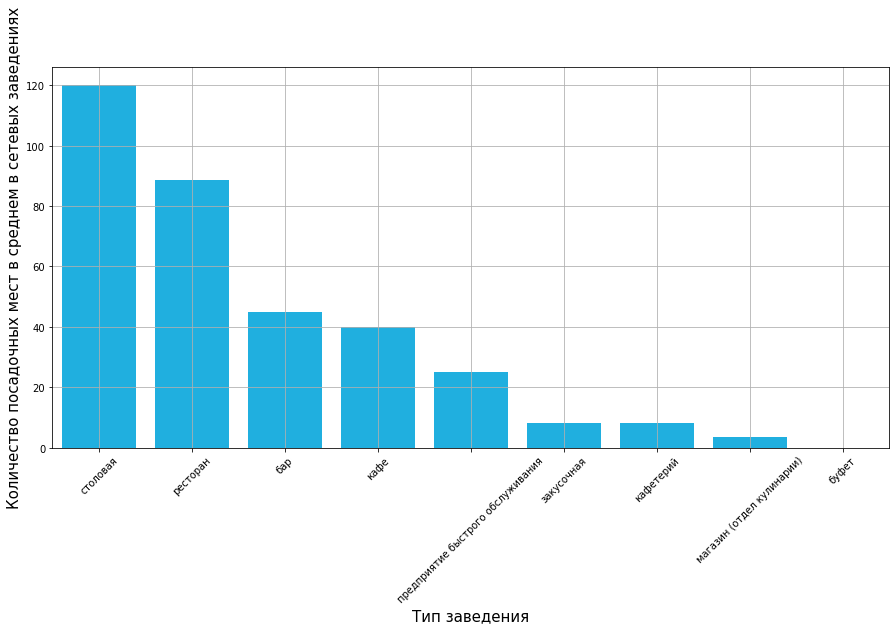

In [21]:
with plt.style.context('seaborn-pastel'):
    
    plt.figure(figsize=(30,10))
#Построим диаграмму рассеяния зависимости количества заведений от количество посадочных мест
    plt.scatter(data_new2[('number','count')],data_new2[('number','median')],alpha=0.6, color='deepskyblue')
    plt.xticks(data_new2[('number','count')],
                    fontsize = 10,    #  Размер шрифта
                    rotation = 45,    #  Поворот текста
                    verticalalignment =  'top')    
    plt.xlabel('Количество заведений в сети', fontsize=20)
    plt.ylabel('Количество посадочных мест', fontsize=20)
#     ax.set_xticklabels(data_new2['object_name'],
#                    fontsize = 10,    #  Размер шрифта
#                    rotation = 45,    #  Поворот текста
#                    verticalalignment =  'top')
#     plt.title('Диаграмма рассеяния количества заведений от количество посадочных мест', fontsize=25);

with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(15,7))
    df = data_new1
    ax = sns.barplot(data=df, x=df['object_type'], y=df['number'], estimator=np.sum, color='deepskyblue')
    labels = df.index
    ax.set_xlabel('Тип заведения', fontsize=15)
    ax.set_ylabel('Количество посадочных мест в среднем в сетевых заведениях', fontsize=15)
    ax.set_xticklabels(df['object_type'],
                   fontsize = 10,    #  Размер шрифта
                   rotation = 45,    #  Поворот текста
                   verticalalignment =  'top') 
    plt.grid(True);
    #     plt.title('Медианное количество посадочных мест в зависимости от типа заведения', fontsize=25);
 # 'top', 'bottom', 'center', 'baseline', 'center_baseline

Как видно из диаграммы рассеяния распространнено малое количество заведений в сети с небольшим количеством посадочных мест.<br>
Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики

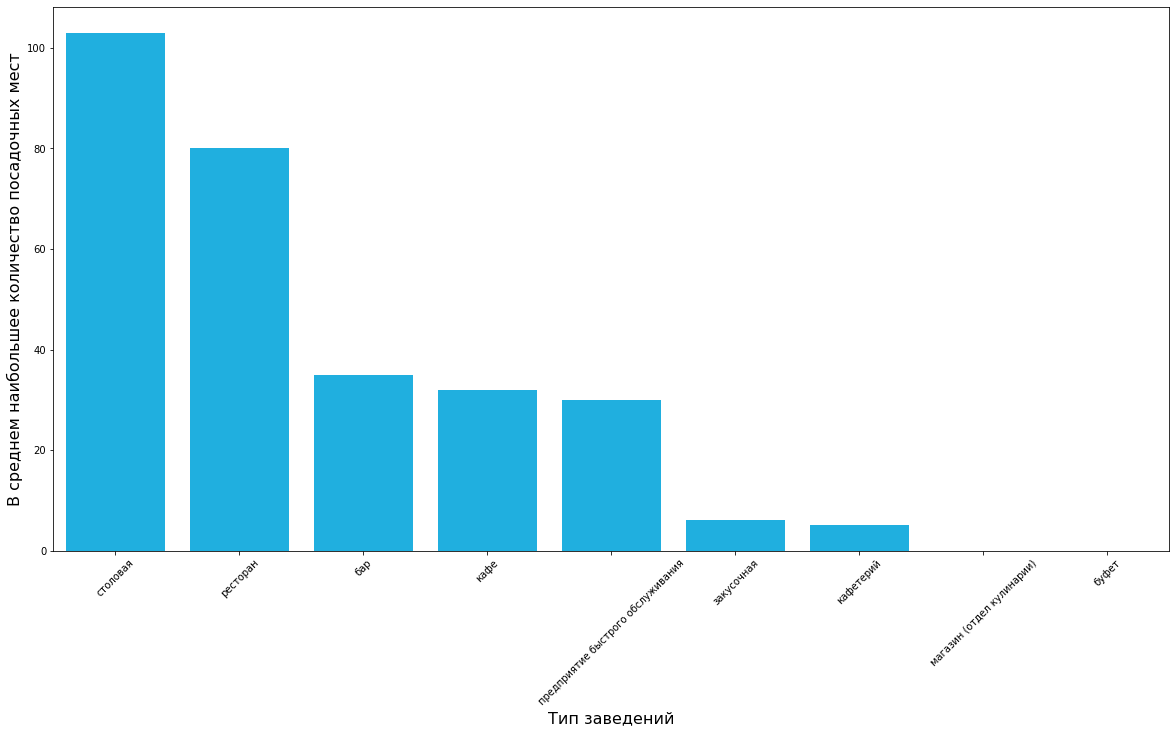

In [22]:
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(20,10))
    dt = data.groupby('object_type').median().reset_index().sort_values(by='number', ascending=False)
    ax = sns.barplot(data=dt, x="object_type", y="number",color='deepskyblue')
    labels = df['object_type'] 
    #ax.set_title('Распределение сетевых заведений', fontsize=24)
    ax.set_xlabel('Тип заведений', fontsize=16)
    ax.set_ylabel('В среднем наибольшее количество посадочных мест', fontsize=16)
    ax.set_xticklabels(df['object_type'],
                   fontsize = 10,    #  Размер шрифта
                   rotation = 45,    #  Поворот текста
                   verticalalignment =  'top') ;

Столовая предоставляет самое большое количество посадочных мест.

Выделим в отдельный столбец информацию об улице из столбца address:

In [23]:
words = ['улица','ул','переулок','шоссе','проспект','площадь','проезд',
         'село','аллея','бульвар','набережная','тупик','линия']

str_pat = r".*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+".format("|".join(words))

data["street"] = data["address"].str.extract(str_pat, flags=0)
data.tail()

,object_name,chain,object_type,address,number,street
15361,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15363,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15364,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,Киевское шоссе
15365,Шоколадница,да,кафе,"город Москва, Ходынский бульвар, дом 4",10,Ходынский бульвар


Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [24]:
df2 = data.groupby('street').count().reset_index().sort_values(by='object_name', ascending=False)
df3 = df2.head(10)
df3

,street,object_name,chain,object_type,address,number
1416,проспект Мира,204,204,204,204,204
1008,Профсоюзная улица,182,182,182,182,182
683,Ленинградский проспект,171,171,171,171,171
993,Пресненская набережная,167,167,167,167,167
397,Варшавское шоссе,164,164,164,164,164
686,Ленинский проспект,147,147,147,147,147
1412,проспект Вернадского,132,132,132,132,132
673,Кутузовский проспект,114,114,114,114,114
596,Каширское шоссе,112,112,112,112,112
603,Кировоградская улица,110,110,110,110,110


In [25]:
from io import BytesIO
import requests
spreadsheet_id = '1_hefKdcFRYraHUmpcjfpRp5CDtBIZ3fDm2c3yDdgfnk'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))
words = ['улица','ул','переулок','шоссе','проспект','площадь','проезд',
         'село','аллея','бульвар','набережная','тупик','линия']

str_pat = r".*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+".format("|".join(words))

df["street"] = df["Address"].str.extract(str_pat, flags=0)

display(df.query('street == "проспект Мира"').head())
display(df.query('street == "Профсоюзная улица"').head())
display(df.query('street == "Ленинградский проспект"').head())
display(df.query('street == "Пресненская набережная"').head())
display(df.query('street == "Варшавское шоссе"').head())
display(df.query('street == "Ленинский проспект"').head())
display(df.query('street == "проспект Вернадского"').head())
display(df.query('street == "Кутузовский проспект"').head())
display(df.query('street == "Каширское шоссе"').head())
df.query('street == "Кировоградская улица"').head()


,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,SeatsCount,SocialPrivileges,Longitude_WGS84,Latitude_WGS84,geodata_center,geoarea,street
377,00149899,Сухарева Башня,637412264,нет,NaN,кафе,Центральный административный округ,Мещанский район,"город Москва, проспект Мира, дом 5, корпус 1",PublicPhone:(915) 311-15-49\n\n,10,нет,37.6319011468383450,55.7742268442102610,NaN,NaN,проспект Мира
378,000071378,Шоколадница,637412334,да,Шоколадница,кафе,Центральный административный округ,Мещанский район,"город Москва, проспект Мира, дом 29",PublicPhone:(910) 485-41-24\n\n,40,нет,37.6325023471684000,55.7798111946039000,NaN,NaN,проспект Мира
379,00146123,Джаганнат,637412336,да,Джаганнат,кафе,Центральный административный округ,Мещанский район,"город Москва, проспект Мира, дом 31",PublicPhone:(495) 680-79-08\n\n,25,нет,37.6325990886982000,55.7801379867079630,NaN,NaN,проспект Мира
380,00137644,Krispy Creme,637412443,да,Krispy Creme,кафе,Центральный административный округ,Мещанский район,"город Москва, проспект Мира, дом 40",PublicPhone:(968) 665-07-80\n\n,36,нет,37.6337160609880500,55.7802365398350800,NaN,NaN,проспект Мира
381,00111162,Брусника,637412600,да,Брусника,кафе,Центральный административный округ,Мещанский район,"город Москва, проспект Мира, дом 49",PublicPhone:(909) 156-55-43\n\n,40,нет,37.6338314726141970,55.7835133898564310,NaN,NaN,проспект Мира


,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,SeatsCount,SocialPrivileges,Longitude_WGS84,Latitude_WGS84,geodata_center,geoarea,street
536,000029061,СТОЛОВАЯ ШК. 4,637424639,нет,NaN,столовая,Юго-Западный административный округ,Академический район,"Российская Федерация, город Москва, внутригоро...",PublicPhone:(499) 125-37-94\n\n,200,нет,37.5691115842892880,55.6826339556933620,NaN,NaN,Профсоюзная улица
537,000023844,Шоколадница,637424850,да,Шоколадница,кафе,Юго-Западный административный округ,Академический район,"Российская Федерация, город Москва, внутригоро...",PublicPhone:(499) 129-80-63\n\n,48,нет,37.5643869863573000,55.6786593642226000,NaN,NaN,Профсоюзная улица
538,000021487,БУФЕТ ШК. 584,637424920,нет,NaN,буфет,Юго-Западный административный округ,Академический район,"Российская Федерация, город Москва, внутригоро...",PublicPhone:(499) 124-55-65\n\n,120,нет,37.5641910029755980,55.6798678352819750,NaN,NaN,Профсоюзная улица
539,000027269,Лимончино,637424978,нет,NaN,ресторан,Юго-Западный административный округ,район Черёмушки,"город Москва, Профсоюзная улица, дом 33, строе...",PublicPhone:(495) 203-56-58\n\n,70,нет,37.5572850000000070,55.6718947330849260,NaN,NaN,Профсоюзная улица
540,000021586,Школьная столовая,637425031,нет,NaN,столовая,Юго-Западный административный округ,район Черёмушки,"город Москва, Профсоюзная улица, дом 40, корпус 2",PublicPhone:(495) 128-18-11\n\n,30,нет,37.5566470000000050,55.6760787342908190,NaN,NaN,Профсоюзная улица


,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,SeatsCount,SocialPrivileges,Longitude_WGS84,Latitude_WGS84,geodata_center,geoarea,street
294,000027898,Столовая МОСГОРГЕОТРЕСТ,637401489,нет,NaN,столовая,Северный административный округ,район Беговой,"город Москва, Ленинградский проспект, дом 11",PublicPhone:(499) 257-02-76\n\n,80,нет,37.5744720922537000,55.7806983151873000,NaN,NaN,Ленинградский проспект
295,000025526,Шоколадница,637401509,да,Шоколадница,кафе,Северный административный округ,район Беговой,"город Москва, Ленинградский проспект, дом 12",PublicPhone:(925) 041-49-48\n\n,45,нет,37.5791083225857000,55.7799750159557000,NaN,NaN,Ленинградский проспект
296,00154663,Хлеб and Co,637401654,да,Хлеб&Co,кафе,Северный административный округ,район Беговой,"город Москва, Ленинградский проспект, дом 24",PublicPhone:(926) 091-15-54\n\n,16,нет,37.5737560000000000,55.7825670000000000,NaN,NaN,Ленинградский проспект
297,000025720,Чайхана ХАЛАЛ,637401701,нет,NaN,кафе,Северный административный округ,район Беговой,"город Москва, Ленинградский проспект, дом 33, ...",PublicPhone:(896) 851-48-83\n\n,28,нет,37.5610148081551000,55.7868812533596000,NaN,NaN,Ленинградский проспект
298,00155931,AL33 Пиццерия Бар Ботега,637401728,нет,NaN,кафе,Северный административный округ,район Беговой,"город Москва, Ленинградский проспект, дом 33, ...",PublicPhone:(495) 946-05-55\n\n,45,нет,37.5599108788037550,55.7872696845354600,NaN,NaN,Ленинградский проспект


,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,SeatsCount,SocialPrivileges,Longitude_WGS84,Latitude_WGS84,geodata_center,geoarea,street
4506,00156815,Обед Буфет,637549534,нет,NaN,кафе,Центральный административный округ,Пресненский район,"Российская Федерация, город Москва, внутригоро...",PublicPhone:(495) 796-12-96\n\n,237,нет,37.5367143579707870,55.7470713950673020,NaN,NaN,Пресненская набережная
4507,000074554,Старбакс,637549541,да,Старбакс,кафе,Центральный административный округ,Пресненский район,"город Москва, Пресненская набережная, дом 10",PublicPhone:(495) 229-26-91\n\n,32,нет,37.5366148651896270,55.7470764249801290,NaN,NaN,Пресненская набережная
4510,00140634,Ресторан «Bamboobar»,637549552,нет,NaN,ресторан,Центральный административный округ,Пресненский район,"Российская Федерация, город Москва, внутригоро...",PublicPhone:(926) 111-11-00\n\n,250,нет,37.5390384540649790,55.7472307493384630,NaN,NaN,Пресненская набережная
4511,00098735,Ресторан «Tutto Bene»,637549555,нет,NaN,ресторан,Центральный административный округ,Пресненский район,"Российская Федерация, город Москва, внутригоро...",PublicPhone:(495) 787-44-33\n\n,150,нет,37.5384580000000000,55.7472260000000000,NaN,NaN,Пресненская набережная
4512,00143839,Grand Урюк Berezka,637549557,нет,NaN,кафе,Центральный административный округ,Пресненский район,"город Москва, Пресненская набережная, дом 8, с...",PublicPhone:(495) 999-63-50\n\n,250,нет,37.5390384540649790,55.7472307493384630,NaN,NaN,Пресненская набережная


,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,SeatsCount,SocialPrivileges,Longitude_WGS84,Latitude_WGS84,geodata_center,geoarea,street
87,00155852,Кафе «Ламаджо»,637383589,нет,NaN,кафе,Южный административный округ,Донской район,"город Москва, Варшавское шоссе, дом 29",PublicPhone:(495) 735-54-03\n\n,30,нет,37.6221058061640580,55.6932343035147850,NaN,NaN,Варшавское шоссе
88,00152556,Донер хаус,637383591,нет,NaN,предприятие быстрого обслуживания,Южный административный округ,Нагорный район,"Российская Федерация, город Москва, внутригоро...",PublicPhone:(909) 978-05-50\n\n,0,нет,37.6187712503296300,55.6568386281426650,NaN,NaN,Варшавское шоссе
880,000070502,Кафе «Мануфактура»,637478671,нет,NaN,кафе,Южный административный округ,Донской район,"город Москва, Варшавское шоссе, дом 9",PublicPhone:(495) 987-22-22\n\n,70,нет,37.6216790374066360,55.7004822420749410,NaN,NaN,Варшавское шоссе
881,000023815,Огни Баку,637478841,нет,NaN,ресторан,Южный административный округ,район Чертаново Южное,"город Москва, Варшавское шоссе, дом 152, корпус 2",PublicPhone:(495) 389-61-63\n\n,380,нет,37.5987514482564000,55.5916618726307000,NaN,NaN,Варшавское шоссе
1375,000029429,АКАДЕМИЯ НАТАЛЬИ НЕСТЕРОВОЙ «КАФЕ УНИВЕРСИТЕТС...,637508712,нет,NaN,столовая,Южный административный округ,Нагорный район,"город Москва, Варшавское шоссе, дом 38",PublicPhone:(499) 740-68-18\n\n,50,нет,37.6239827374806880,55.6780697796313010,NaN,NaN,Варшавское шоссе


,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,SeatsCount,SocialPrivileges,Longitude_WGS84,Latitude_WGS84,geodata_center,geoarea,street
318,000022636,Де Марко,637407600,да,Де Марко,кафе,Центральный административный округ,район Якиманка,"город Москва, Ленинский проспект, дом 13",PublicPhone:(499) 237-47-23\n\n,120,нет,37.6021524892875000,55.7220992933068000,NaN,NaN,Ленинский проспект
319,000026254,ПИВНУШКА,637407602,нет,NaN,ресторан,Южный административный округ,Донской район,"город Москва, Ленинский проспект, дом 28",PublicPhone:(495) 952-55-67\n\n,80,нет,37.5886104006365900,55.7134931894363990,NaN,NaN,Ленинский проспект
320,000076398,Илья Муромец,637407682,да,Илья Муромец,ресторан,Южный административный округ,Донской район,"Российская Федерация, город Москва, внутригоро...",PublicPhone:(495) 649-46-88\n\n,100,нет,37.5871463643617790,55.7098934300664080,NaN,NaN,Ленинский проспект
321,000027259,Ресторан «Корчма Тарас Бульба»,637407790,да,Корчма Тарас Бульба,ресторан,Южный административный округ,Донской район,"город Москва, Ленинский проспект, дом 37",PublicPhone:(495) 954-64-66\n\n,70,нет,37.5871463643617790,55.7098934300664080,NaN,NaN,Ленинский проспект
322,00134332,Кофейня «Шоколадница»,637407892,да,Шоколадница,кафе,Южный административный округ,Донской район,"город Москва, Ленинский проспект, дом 37А",PublicPhone:(495) 952-33-98\n\n,43,нет,37.5857751327422920,55.7092603796093750,NaN,NaN,Ленинский проспект


,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,SeatsCount,SocialPrivileges,Longitude_WGS84,Latitude_WGS84,geodata_center,geoarea,street
92,00148853,Кафе контдитерская Кузина,637384323,нет,NaN,кафе,Юго-Западный административный округ,Ломоносовский район,"город Москва, проспект Вернадского, дом 11/19",PublicPhone:(495) 780-08-62\n\n,4,нет,37.5291667803180360,55.6888680628134690,NaN,NaN,проспект Вернадского
93,00149149,Суши WoK,637384336,да,Суши Wok,кафе,Юго-Западный административный округ,Ломоносовский район,"город Москва, проспект Вернадского, дом 11/19",PublicPhone:(499) 754-44-44\n\n,8,нет,37.5291667803180360,55.6888680628134690,NaN,NaN,проспект Вернадского
96,000069990,Старый Сычуань,637384692,нет,NaN,ресторан,Западный административный округ,район Тропарёво-Никулино,"Российская Федерация, город Москва, внутригоро...",PublicPhone:(495) 120-66-17\n\n,60,нет,37.4948640000000070,55.6674157317944780,NaN,NaN,проспект Вернадского
97,000020147,Кафе «Пекарня «Мюнгер»»,637384718,нет,NaN,кафе,Западный административный округ,район Тропарёво-Никулино,"город Москва, проспект Вернадского, дом 97, ко...",PublicPhone:(495) 792-17-30\n\n,30,нет,37.4909802590976000,55.6674481430433000,NaN,NaN,проспект Вернадского
856,00157568,Кафе «Tornano»,637476221,нет,NaN,кафе,Западный административный округ,район Тропарёво-Никулино,"город Москва, проспект Вернадского, дом 92",PublicPhone:(499) 737-34-86\n\n,18,нет,37.4730615297238500,55.6552217599012380,NaN,NaN,проспект Вернадского


,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,SeatsCount,SocialPrivileges,Longitude_WGS84,Latitude_WGS84,geodata_center,geoarea,street
286,000069895,КРИСТИАН,637400745,нет,NaN,ресторан,Западный административный округ,район Дорогомилово,"город Москва, Кутузовский проспект, дом 2/1, к...",PublicPhone:(499) 243-25-67\n\n,96,нет,37.5643014588570000,55.7504696207787000,NaN,NaN,Кутузовский проспект
287,000020418,ДИОРАМА БАР,637400771,нет,NaN,бар,Западный административный округ,район Дорогомилово,"город Москва, Кутузовский проспект, дом 2/1, к...",PublicPhone:(495) 229-55-55\n\n,3,нет,37.5641335735313580,55.7515729459509970,NaN,NaN,Кутузовский проспект
288,000027025,КЛУБНЫЙ РЕСТОРАН,637400823,нет,NaN,ресторан,Западный административный округ,район Дорогомилово,"город Москва, Кутузовский проспект, дом 2/1, к...",PublicPhone:(495) 221-55-55\n\n,12,нет,37.5641335735313580,55.7515729459509970,NaN,NaN,Кутузовский проспект
289,000026346,PINOCCHIO,637400852,нет,NaN,ресторан,Западный административный округ,район Дорогомилово,"город Москва, Кутузовский проспект, дом 4/2",PublicPhone:(495) 545-01-71\n\n,100,нет,37.5623375556983000,55.7496059697563000,NaN,NaN,Кутузовский проспект
290,000069884,КОФЕМАНИЯ,637400931,да,Кофемания,кафе,Западный административный округ,район Дорогомилово,"город Москва, Кутузовский проспект, дом 17",PublicPhone:(495) 781-16-90\n\n,60,нет,37.5568053283650000,55.7465883331539000,NaN,NaN,Кутузовский проспект


,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,SeatsCount,SocialPrivileges,Longitude_WGS84,Latitude_WGS84,geodata_center,geoarea,street
227,000027289,Ресторан «Тануки»,637394979,да,Тануки,ресторан,Южный административный округ,район Москворечье-Сабурово,"город Москва, Каширское шоссе, дом 46, корпус 1",PublicPhone:(495) 324-71-91\n\n,50,нет,37.6649215436533000,55.6478957630439000,NaN,NaN,Каширское шоссе
878,000081199,Изи паб,637478540,нет,NaN,кафе,Южный административный округ,район Орехово-Борисово Южное,"Российская Федерация, город Москва, внутригоро...",PublicPhone:(499) 272-28-77\n\n,35,нет,37.7181100000000030,55.6061607141982320,NaN,NaN,Каширское шоссе
2358,000029321,Столовая ЦО САБУРОВО 1828 КДП,637533332,нет,NaN,столовая,Южный административный округ,район Москворечье-Сабурово,"город Москва, Каширское шоссе, дом 55, корпус 7",PublicPhone:(495) 344-70-56\n\n,200,нет,37.6969959999999990,55.6399357238885560,NaN,NaN,Каширское шоссе
2359,000029322,Столовая ЦО САБУРОВО 1828 КДП- 1,637533334,нет,NaN,столовая,Южный административный округ,район Москворечье-Сабурово,"город Москва, Каширское шоссе, дом 55, корпус 7",PublicPhone:(495) 344-70-56\n\n,180,нет,37.6979360533613810,55.6394334162798640,NaN,NaN,Каширское шоссе
2390,000026586,Ресторан «Мтиели»,637533399,нет,NaN,ресторан,Южный административный округ,район Москворечье-Сабурово,"Российская Федерация, город Москва, внутригоро...",PublicPhone:(495) 324-31-01\n\n,50,нет,37.6617672668516000,55.6489309895317000,NaN,NaN,Каширское шоссе


,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,SeatsCount,SocialPrivileges,Longitude_WGS84,Latitude_WGS84,geodata_center,geoarea,street
1391,000029355,СТОЛОВАЯ ШКОЛЫ 1245,637509302,нет,NaN,столовая,Южный административный округ,район Чертаново Южное,"город Москва, Кировоградская улица, дом 42, ко...",PublicPhone:(495) 387-21-18\n\n,240,нет,37.5938943516965910,55.5995916978846410,NaN,NaN,Кировоградская улица
1392,000029058,ПОЛИГРАФИЧЕСКИЙ КОЛЛЕДЖ 56,637509304,нет,NaN,столовая,Южный административный округ,район Чертаново Южное,"город Москва, Кировоградская улица, дом 23",PublicPhone:(495) 388-42-11\n\n,200,нет,37.5982525777016510,55.5992692859999100,NaN,NaN,Кировоградская улица
1393,000029347,СТОЛОВАЯ ШКОЛЫ 549,637509330,нет,NaN,столовая,Южный административный округ,район Чертаново Южное,"город Москва, Кировоградская улица, дом 21",PublicPhone:(495) 386-99-00\n\n,300,нет,37.6019115352764360,55.6033607055301500,NaN,NaN,Кировоградская улица
1394,000029047,ГБОУ СОШ 1582,637509332,нет,NaN,столовая,Южный административный округ,район Чертаново Центральное,"город Москва, Кировоградская улица, дом 18, ко...",PublicPhone:(495) 311-41-45\n\n,240,да,37.6013300552443110,55.6178819533096490,NaN,NaN,Кировоградская улица
1395,000029352,СТОЛОВАЯ ШКОЛЫ 1171,637509383,нет,NaN,столовая,Южный административный округ,район Чертаново Южное,"город Москва, Кировоградская улица, дом 42Б",PublicPhone:(495) 386-68-89\n\n,300,нет,37.5956490727136980,55.5993079776370250,NaN,NaN,Кировоградская улица


Обратившись к внешним данным, мы можем увидеть, что улицы расположены в оживленных направлениях выезда из города. ЦАО, ЮЗАЮ, ЮАО, САО, ЮАО. Длинные протяженные улицы от центра города до его окраин, поэтому на этих расположено большое количество заведений общественного питания.

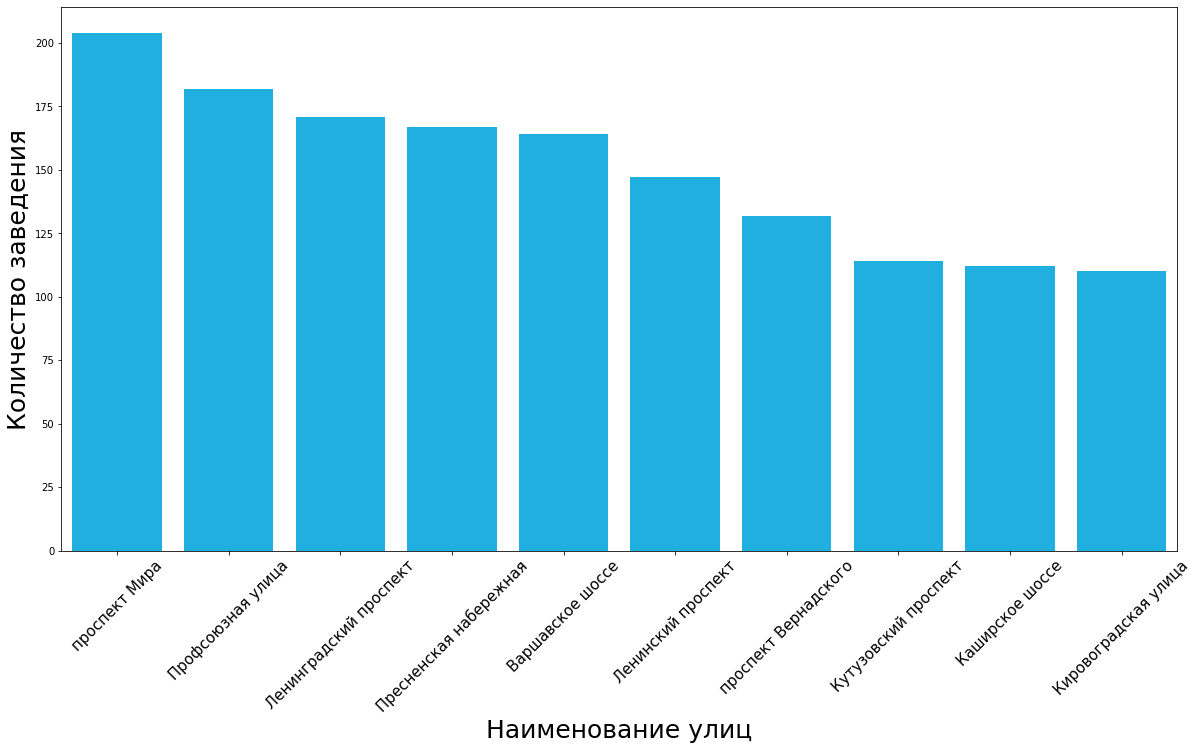

In [26]:
with plt.style.context('tableau-colorblind10'):
    plt.figure(figsize=(20,10))
    ax = sns.barplot(data=df3, x='street', y='object_name',color='deepskyblue')
    labels = df3['street'] 
    #ax.set_title('Распределение сетевых заведений', fontsize=24)
    ax.set_xlabel('Наименование улиц', fontsize=25)
    ax.set_ylabel('Количество заведения', fontsize=25);
    labels = ax.set_xticklabels(labels,
                   fontsize = 15,    #  Размер шрифта
                   rotation = 45,    #  Поворот текста
                   verticalalignment =  'top')   
    

Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [27]:
df4 = data.groupby('street').count().reset_index().sort_values(by='object_name', ascending=False)
df5 = df4.query('object_name == 1')['street'].count()
print(df5)
street = df4.query('object_name == 1')['street']
print(street)

551
1566    улица Дмитрия Рябинкина
1600        улица Инессы Арманд
260            Бабаевская улица
1624    улица Корнея Чуковского
286     Берниковская набережная
                 ...           
537             Зарайская улица
531            Заводской проезд
1336           Юрловский проезд
527                Жуков проезд
948            Перовский проезд
Name: street, Length: 551, dtype: object


Добавлен внешний источник и выведены данные по улицам с одним заведением.


С помощью внешних данных проанализикуем расположение 5 первых и 5-ти послдених улиц с одним заведением. 

In [28]:
display(df.query('street == "улица Дмитрия Рябинкина"').head())
display(df.query('street == "улица Инессы Арманд"').head())
display(df.query('street == "Бабаевская улица"').head())
display(df.query('street == "улица Корнея Чуковского"').head())
display(df.query('street == "Берниковская набережная"').head())
display(df.query('street == "Зарайская улица"').head())
display(df.query('street == "Заводской проезд"').head())
display(df.query('street == "Юрловский проезд"').head())
display(df.query('street == "Жуков проезд"').head())
df.query('street == "Перовский проезд"').head()

,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,SeatsCount,SocialPrivileges,Longitude_WGS84,Latitude_WGS84,geodata_center,geoarea,street


,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,SeatsCount,SocialPrivileges,Longitude_WGS84,Latitude_WGS84,geodata_center,geoarea,street
19157,00360497,Шаурма Донер Кебаб,2375985680,нет,NaN,предприятие быстрого обслуживания,Юго-Западный административный округ,район Ясенево,"Российская Федерация, город Москва, внутригоро...",PublicPhone:(925) 733-06-66\n\n,2,нет,37.5452349999999910,55.5909667098485440,NaN,NaN,улица Инессы Арманд


,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,SeatsCount,SocialPrivileges,Longitude_WGS84,Latitude_WGS84,geodata_center,geoarea,street


,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,SeatsCount,SocialPrivileges,Longitude_WGS84,Latitude_WGS84,geodata_center,geoarea,street
4883,00158874,Карлсон и Ко,645581152,нет,NaN,кафе,Новомосковский административный округ,поселение Внуковское,"город Москва, поселение Внуковское, улица Корн...",PublicPhone:(905) 503-16-66\n\n,7,нет,37.3260830000000000,55.6374640000000000,NaN,NaN,улица Корнея Чуковского


,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,SeatsCount,SocialPrivileges,Longitude_WGS84,Latitude_WGS84,geodata_center,geoarea,street
2765,000020999,МОСК. ГОС. АВИАЦ.-ТЕХНОЛОГИЧ. УНИВЕРСИТЕТ,637534779,нет,NaN,буфет,Центральный административный округ,Таганский район,"город Москва, Берниковская набережная, дом 12,...",PublicPhone:(495) 915-55-13\n\n,32,нет,37.6510281918266970,55.7487279498736610,NaN,NaN,Берниковская набережная


,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,SeatsCount,SocialPrivileges,Longitude_WGS84,Latitude_WGS84,geodata_center,geoarea,street
12001,00140772,Зарайский дворик,1104139702,нет,NaN,кафе,Юго-Восточный административный округ,Рязанский район,"город Москва, Зарайская улица, дом 33, корпус 2",PublicPhone:(968) 560-97-58\n\n,44,нет,37.7706500761051560,55.7302712098615060,NaN,NaN,Зарайская улица


,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,SeatsCount,SocialPrivileges,Longitude_WGS84,Latitude_WGS84,geodata_center,geoarea,street


,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,SeatsCount,SocialPrivileges,Longitude_WGS84,Latitude_WGS84,geodata_center,geoarea,street
3011,000025564,КУРАГА,637536115,нет,NaN,кафе,Северо-Восточный административный округ,район Отрадное,"Российская Федерация, город Москва, внутригоро...",PublicPhone:(926) 159-99-90\n\n,229,нет,37.6190121808805000,55.8706514719961000,NaN,NaN,Юрловский проезд
16593,00343273,Буханка,2363080717,да,Буханка,кафетерий,Северо-Восточный административный округ,район Отрадное,"Российская Федерация, город Москва, внутригоро...",PublicPhone:(905) 687-03-29\n\n,10,нет,37.6129489999999860,55.8788757932817290,NaN,NaN,Юрловский проезд


,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,SeatsCount,SocialPrivileges,Longitude_WGS84,Latitude_WGS84,geodata_center,geoarea,street
14468,00322612,Кофейня Ter. Mos,1146541859,нет,NaN,кафетерий,Южный административный округ,Даниловский район,"город Москва, Жуков проезд, дом 21Б",PublicPhone:(939) 555-13-24\n\n,12,нет,37.6459839999999990,55.7225297477093090,NaN,NaN,Жуков проезд
14469,00322614,Шаурма 24,1146541860,нет,NaN,закусочная,Южный административный округ,Даниловский район,"город Москва, Жуков проезд, дом 21Б",PublicPhone:(999) 444-70-31\n\n,2,нет,37.6459839999999990,55.7225297477093090,NaN,NaN,Жуков проезд


,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,SeatsCount,SocialPrivileges,Longitude_WGS84,Latitude_WGS84,geodata_center,geoarea,street


Улицы малооживленые расположенные в спальных районах города или в узких маленьких переулках. В основном они расположены в спальных районах города, нанепроходных улицах. 

## Выводы
• Данные для исследовании взяты с "Портала открытых данных" Правительства Москвы. Набор данных позволяет получить подробную информацию о предприятиях  общественного питания в городе Москве в части наименования, точного адреса, специализации и расположения. Последнее обновление было в августе 2022 года. В нашей стране в настоящее время одной из самых динамично развивающихся отраслей является отрасль общественного питания, при этом общественное питание несет в себе важное социальное и экономическое значение.<br>
• В исходных данных названия столбцов в соответствии со "змеиным регистром", отсутствуют явные дубликаты и пропущенные значения, тип и формат данных корректные. Обнаружены и удалены неявные дубликаты. По количеству посадочных мест только одно метсо может посадить 1700 человек. Это клуб-бар Arena by Soho Family. К заведениям без посадочных мест относятся предприятия быстрого обслуживания: фаст-фуд, "шаурмичные", магазины с готовой едой.Данные готовы для дальнейшего использования<br>
• В Москве больше всего несетевых кафе<br>
• В Москве больше всего заведений с малыми количеством посадочных мест<br>
• Больше всего посадочных мест в столовых и в ресторанах<br>
• Самые популярные улицу по количеству заведений: Проспект Мира, Профсоюзная улица и Ленинградский проспект<br><br>
• В качестве рекомендации: для открытия кафе стоит рассматривать улицы в центре Москвы, где большой проходной поток людей, около 20 посыдочных мест формата - кафе, с учетом специфики заведения, надо выбрать улицы в центре, где заведения уже присутствуют и новый формат кафе станет его изюминкой и привлечет новую публику. Так как сами роботы дорогие для открытия первого кафе стоит рассматривать небольшую площать в центре города (т.к. аренда также юудет высока), при этом посадочных мест должно быть не много (роботам нужно место для маневров), также роботы будут достаточно медлительные и большое количество народу обслужить не смогут.<br>
• Презентация приложена ниже


Ссылка на презентацию <https://1drv.ms/b/s!AmYj5XMQRWbKfW-RY6lNJgMO3bE>